In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
def parse_year(year):
    return pd.to_datetime(str(year), format='%Y')

In [37]:
immo_AP_H = pd.read_csv('../data/raw/appended_data.csv', parse_dates=['Build Year'], date_format=parse_year)
# immo_raw_df = pd.read_csv('../data/raw/rawdata.csv')
immo_AP_H.head()

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count,Municipality,Province
0,11149965,Waremme,4300,1974.0,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
1,11149932,Wetteren,9230,2015.0,3.0,134.0,NaN,APARTMENT,DUPLEX,339000,...,GAS,NaN,NaN,NaN,NaN,NaN,1.0,NaN,WETTEREN,OOST-VLAANDEREN
2,11150061,Ixelles,1050,1958.0,2.0,134.0,NaN,APARTMENT,APARTMENT,495000,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELSENE,BRUSSEL
3,11153822,BERCHEM,2600,1968.0,2.0,90.0,NaN,APARTMENT,APARTMENT,175000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ANTWERPEN,ANTWERPEN
4,11153121,Jette,1090,1965.0,2.0,80.0,NaN,APARTMENT,APARTMENT,289000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JETTE,BRUSSEL


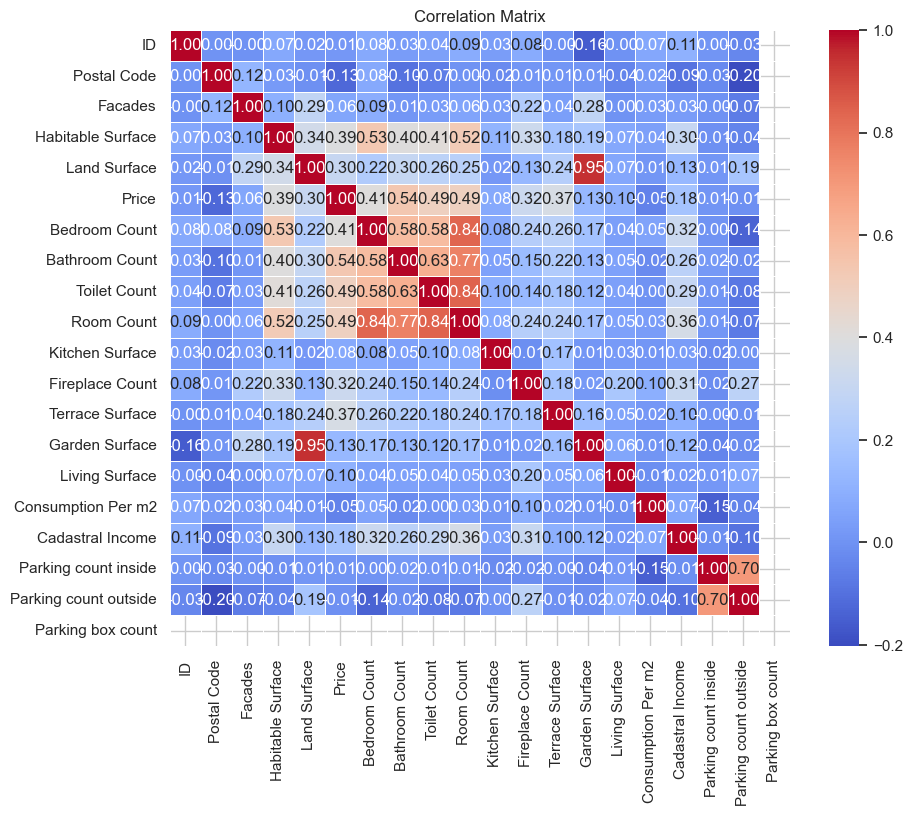

In [38]:
correlation_matrix = immo_AP_H[immo_AP_H.select_dtypes(include=['int', 'float']).columns].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [39]:
immo_AP_H.isnull().sum()

ID                           0
Locality                     0
Postal Code                  0
Build Year                3245
Facades                   3311
Habitable Surface          382
Land Surface              7576
Type                         0
Subtype                      0
Price                        0
Sale Type                    0
Bedroom Count              102
Bathroom Count            1652
Toilet Count              2966
Room Count                 165
Kitchen                      0
Kitchen Surface           8237
Kitchen Type              2942
Furnished                    0
Openfire                     0
Fireplace Count           8305
Terrace                      0
Terrace Surface           3786
Terrace Orientation      10880
Garden Exists                0
Garden Surface            9277
Garden Orientation       10230
Swimming Pool             7277
State of Building         4396
Living Surface            6243
EPC                       4637
Consumption Per m2        5047
Cadastra

In [40]:
immo_AP_H.dropna(subset=['Province'], inplace=True)

In [41]:
immo_AP_H.isnull().sum()

ID                           0
Locality                     0
Postal Code                  0
Build Year                3243
Facades                   3311
Habitable Surface          381
Land Surface              7576
Type                         0
Subtype                      0
Price                        0
Sale Type                    0
Bedroom Count              102
Bathroom Count            1651
Toilet Count              2965
Room Count                 165
Kitchen                      0
Kitchen Surface           8235
Kitchen Type              2942
Furnished                    0
Openfire                     0
Fireplace Count           8304
Terrace                      0
Terrace Surface           3784
Terrace Orientation      10878
Garden Exists                0
Garden Surface            9275
Garden Orientation       10228
Swimming Pool             7275
State of Building         4396
Living Surface            6241
EPC                       4635
Consumption Per m2        5046
Cadastra

In [42]:
immo_AP_raw = immo_AP_H[immo_AP_H['Type'] == 'APARTMENT']
immo_H_raw = immo_AP_H[immo_AP_H['Type'] == 'HOUSE']

In [43]:
immo_AP_raw.shape

(7575, 45)

In [44]:
immo_H_raw.shape

(3468, 45)

In [45]:
immo_H_raw.Municipality.unique()

array(['DEINZE', 'MESSANCY', 'BRAKEL', 'LA HULPE', 'HASSELT', 'NEUPRÉ',
       'TREMELO', 'TURNHOUT', 'LILLE', 'TERNAT', 'SINT-AGATHA-BERCHEM',
       'BORNEM', 'HEIST-OP-DEN-BERG', 'PROFONDEVILLE', 'EGHEZÉE',
       'SINT-NIKLAAS', 'DENTERGEM', 'VILLERS-LA-VILLE', 'BASSENGE',
       'JABBEKE', 'OOSTENDE', 'DIKSMUIDE', 'MOERBEKE-WAAS', 'GAVERE',
       'LAAKDAL', 'RANST', 'STEENOKKERZEEL', 'GENT', 'ANDERLECHT',
       'VERVIERS', 'ESTAIMPUIS', 'MOESKROEN', 'GERAARDSBERGEN',
       'PUURS-SINT-AMANDS', 'LIER', 'HERENTALS', 'DEERLIJK', 'MOL',
       'VOSSELAAR', 'KRUIBEKE', 'WACHTEBEKE', 'MERELBEKE', 'AARSCHOT',
       'LEUVEN', 'LOBBES', 'REMICOURT', 'NAMUR', 'THEUX',
       'CHAPELLE-LEZ-HERLAIMONT', 'MANAGE', 'OUPEYE', 'ANTWERPEN',
       'LIÈGE', 'RONSE', 'MARCHIN', 'BEYNE-HEUSAY', 'HUY', 'NAZARETH',
       'ERPE-MERE', 'BEERSEL', 'HEMIKSEM', 'GLABBEEK',
       'JEMEPPE-SUR-SAMBRE', 'KOKSIJDE', 'GEEL', 'ROTSELAAR', 'PERWEZ',
       'SERAING', 'LEDEGEM', 'ROESELARE', 'DE PANNE',
     

In [46]:
immo_H_raw.Province.unique()

array(['OOST-VLAANDEREN', 'LUXEMBURG', 'WAALS-BRABANT', 'LIMBURG', 'LUIK',
       'VLAAMS-BRABANT', 'ANTWERPEN', 'BRUSSEL', 'NAMEN',
       'WEST-VLAANDEREN', 'HENEGOUWEN'], dtype=object)

<Figure size 10000x10000 with 0 Axes>

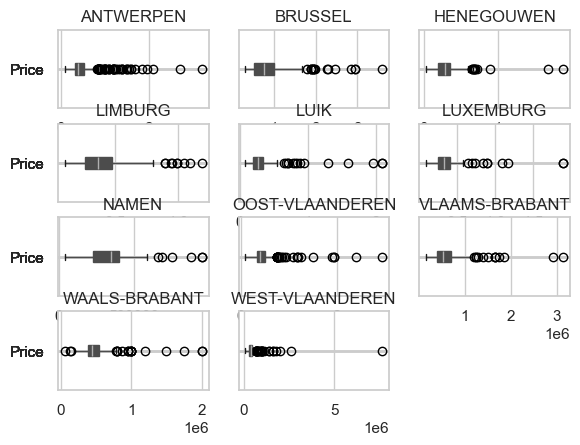

In [47]:
region_group = immo_H_raw.groupby('Province')

plt.figure(figsize=(100, 100)) 
region_group.boxplot(column='Price', vert=False, patch_artist=True)
plt.xlabel('Price')
plt.ylabel('Province')
plt.title("Boxplot - House's Price per Province")
plt.show()


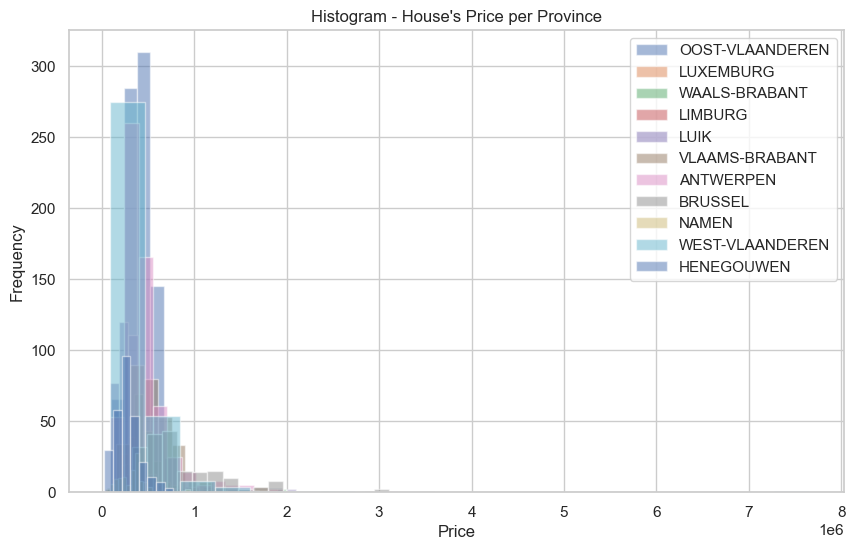

In [48]:
unique_regions = immo_H_raw['Province'].unique()

plt.figure(figsize=(10, 6))  
for region in unique_regions:
    region_price = immo_H_raw[immo_H_raw['Province'] == region]['Price']
    plt.hist(region_price, bins=20, alpha=0.5, label=region)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Histogram - House's Price per Province")
plt.legend()
plt.show()

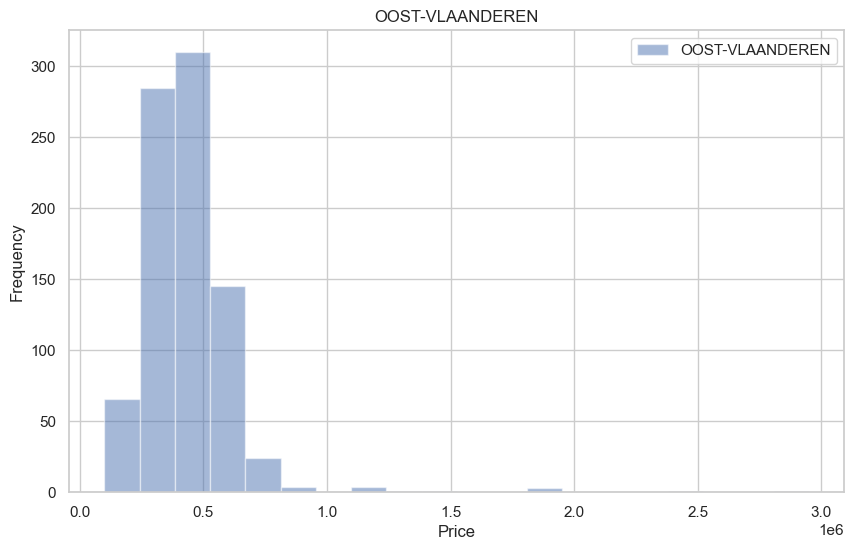

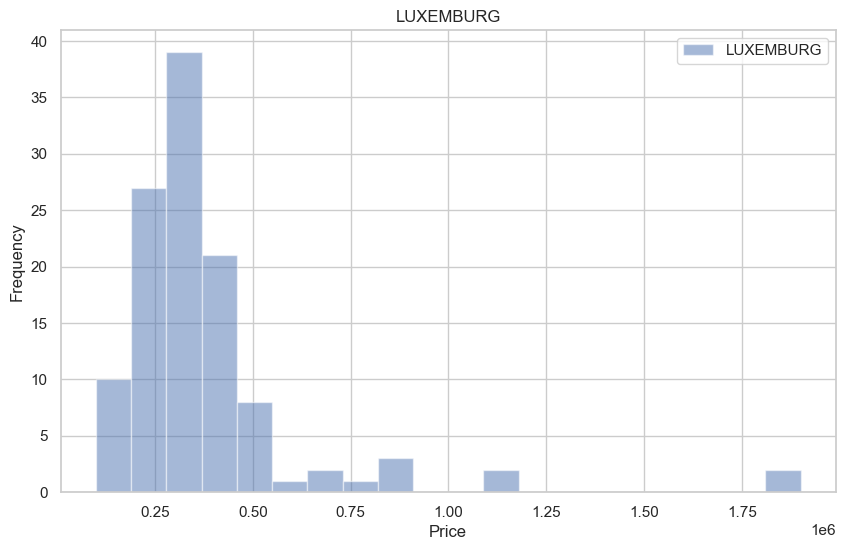

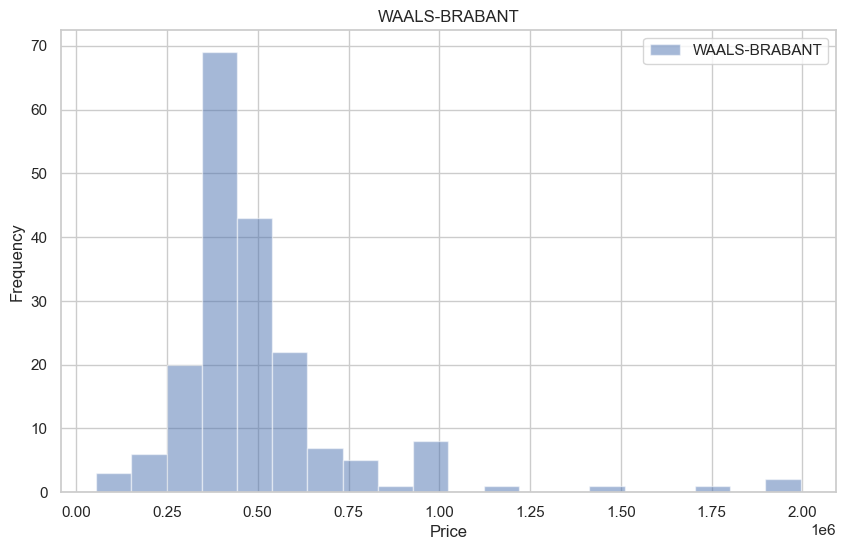

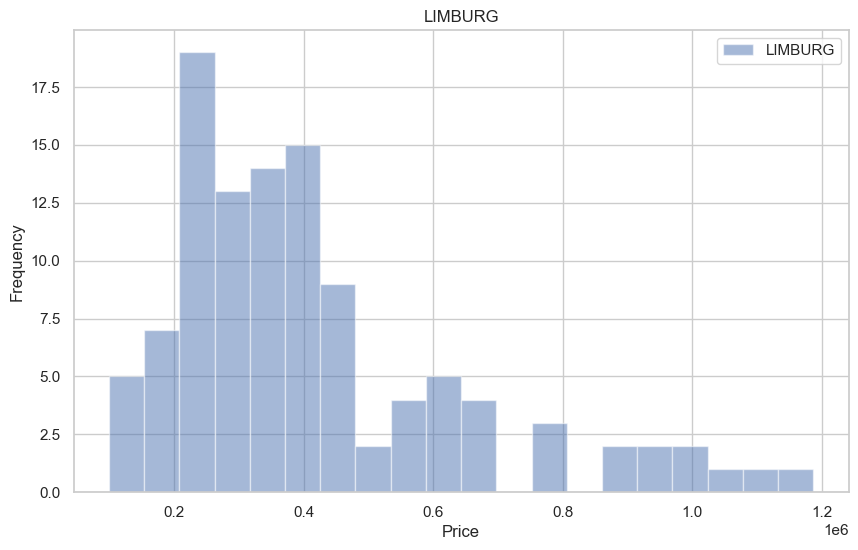

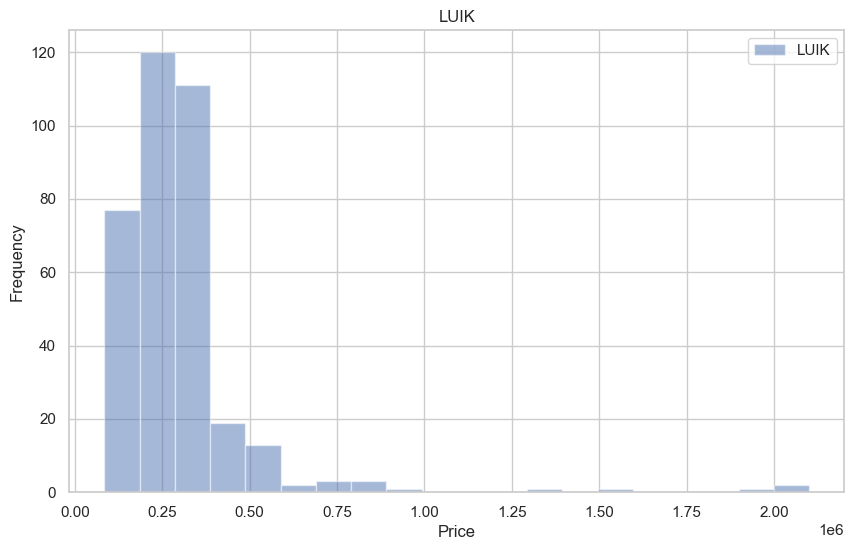

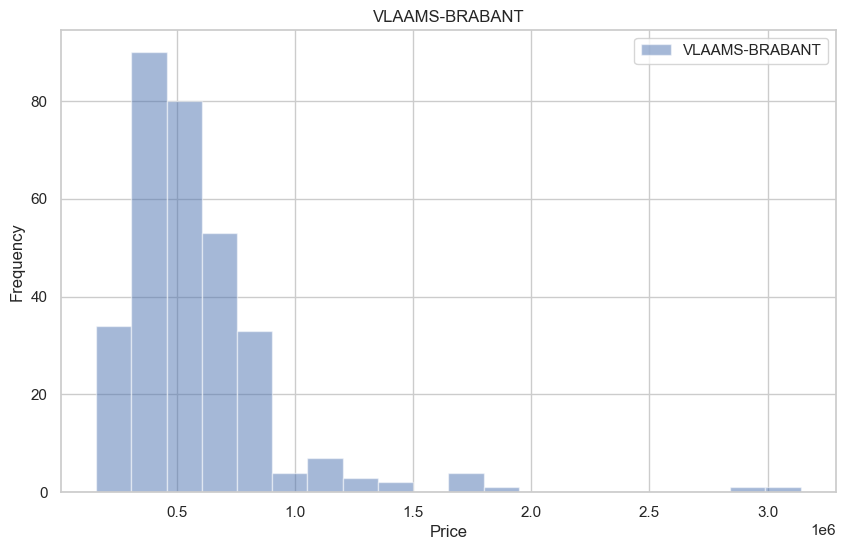

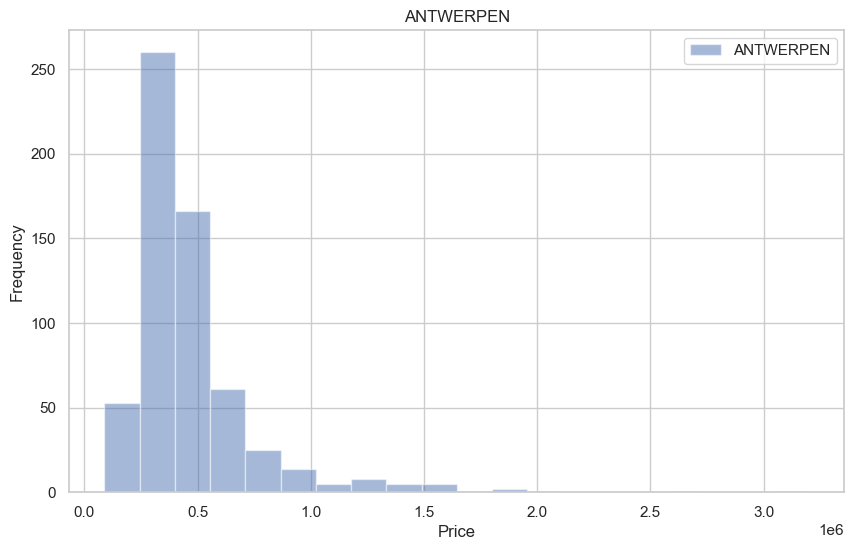

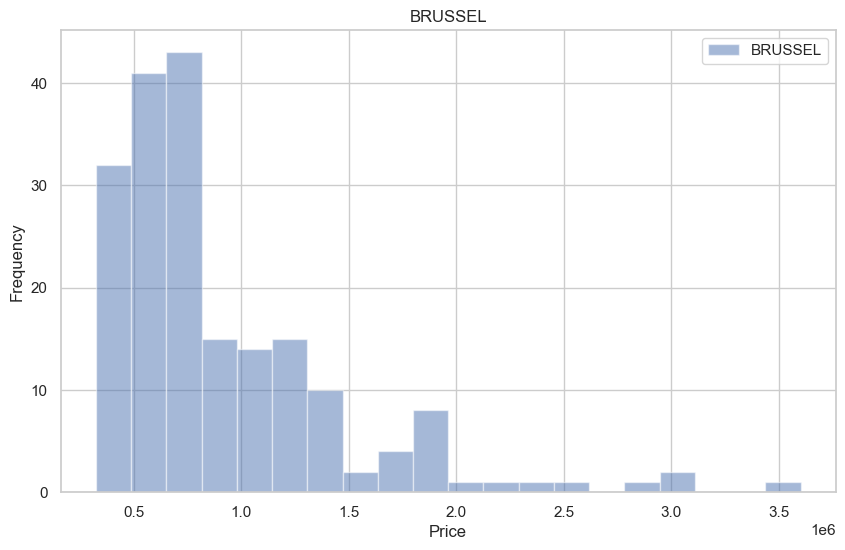

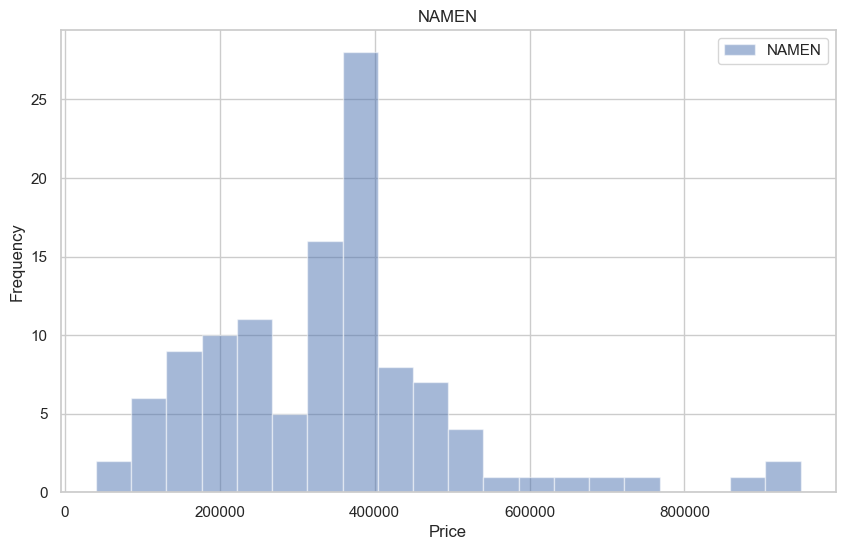

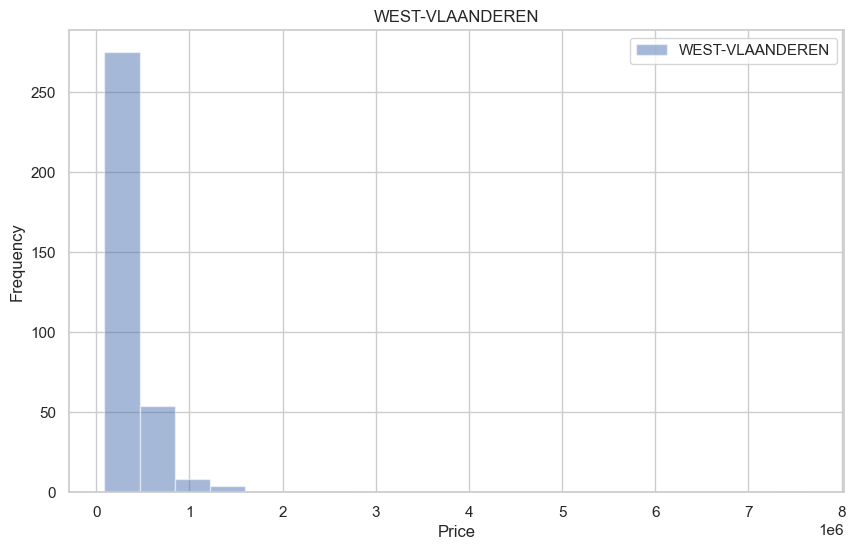

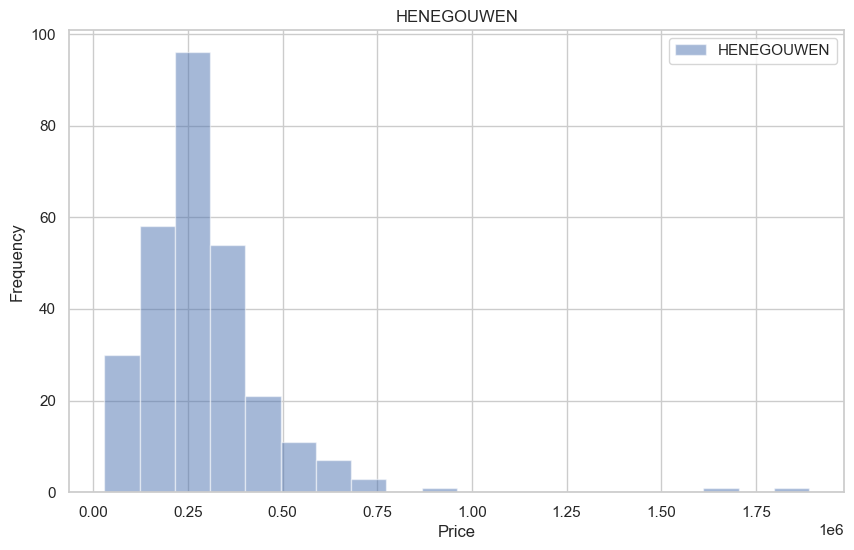

In [49]:
for prov in immo_H_raw['Province'].unique():
    plt.figure(figsize=(10, 6))  
    
    region_price = immo_H_raw[immo_H_raw['Province'] == prov]['Price']
    plt.hist(region_price, bins=20, alpha=0.5, label=prov)
    
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title(prov)
    plt.legend()
    plt.show()

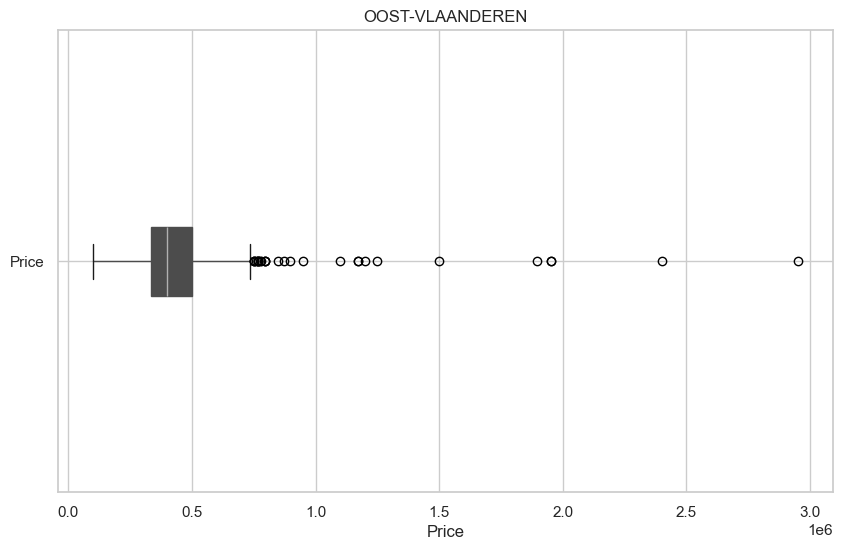

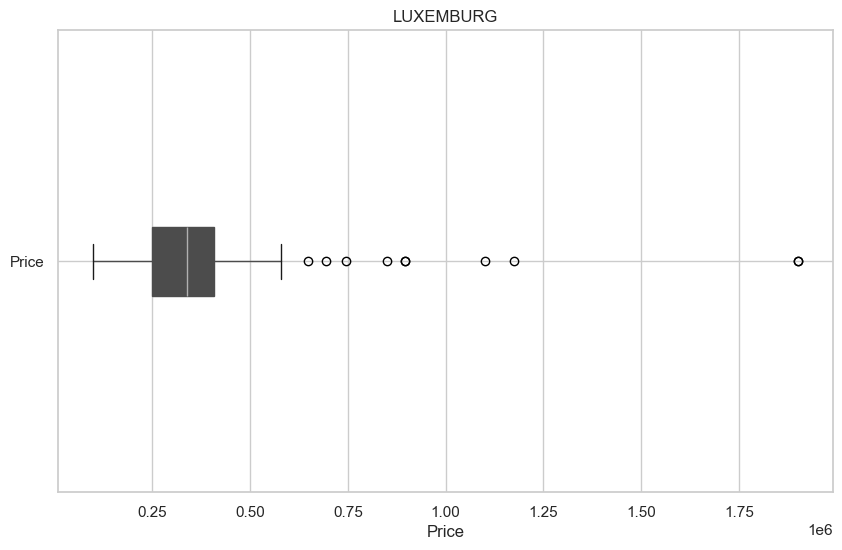

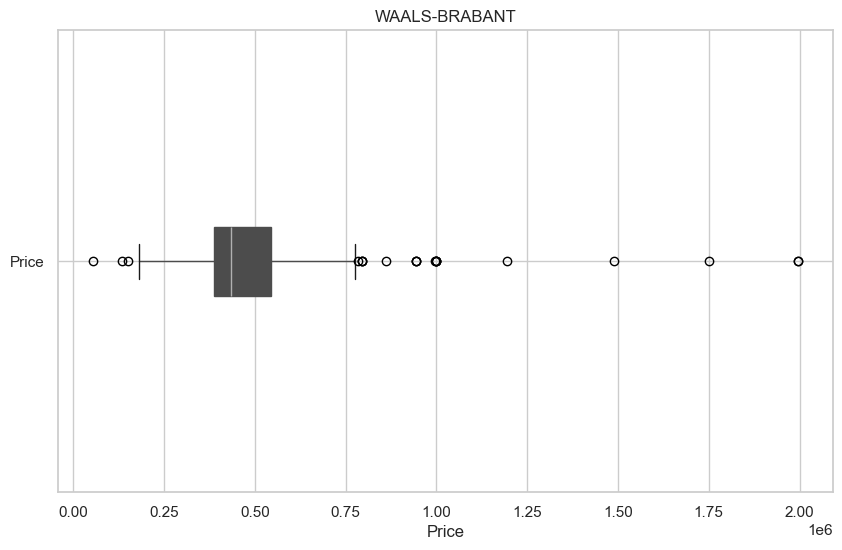

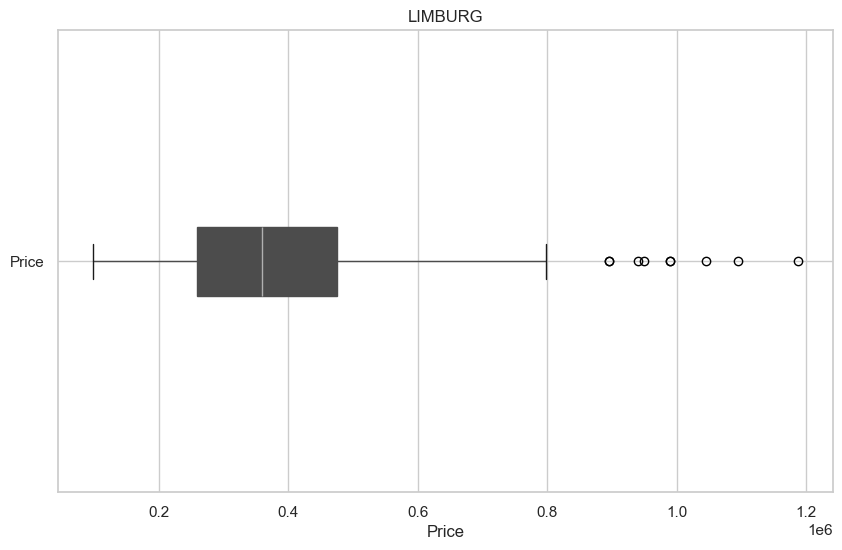

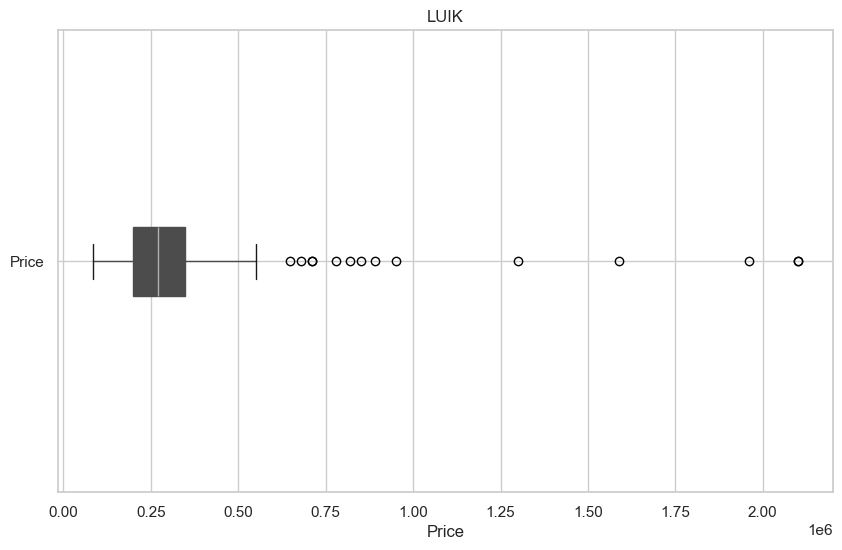

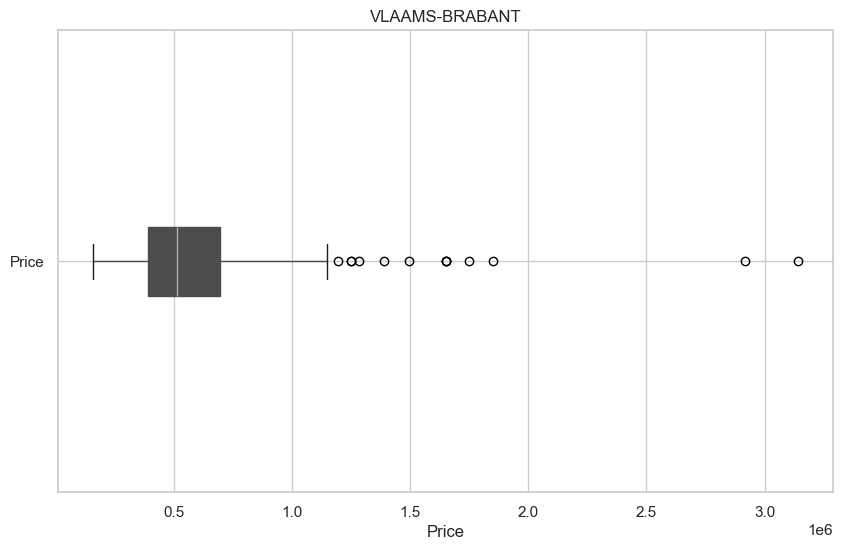

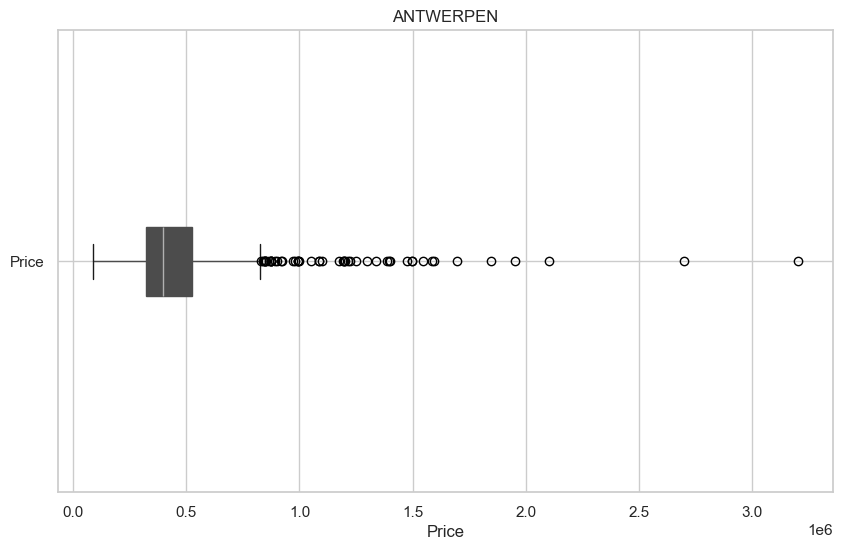

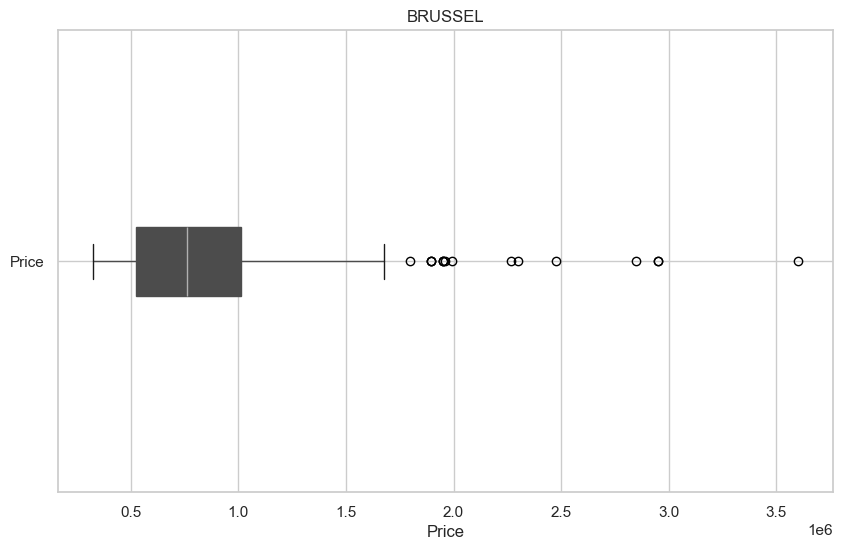

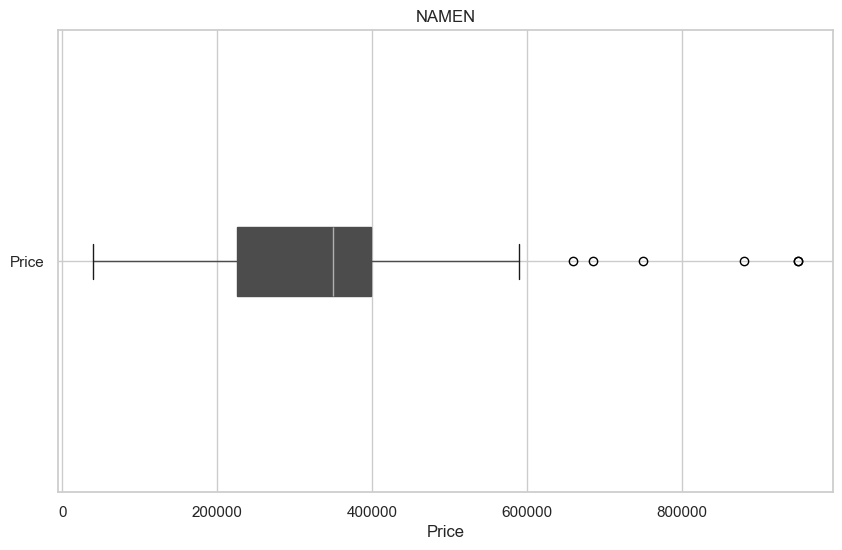

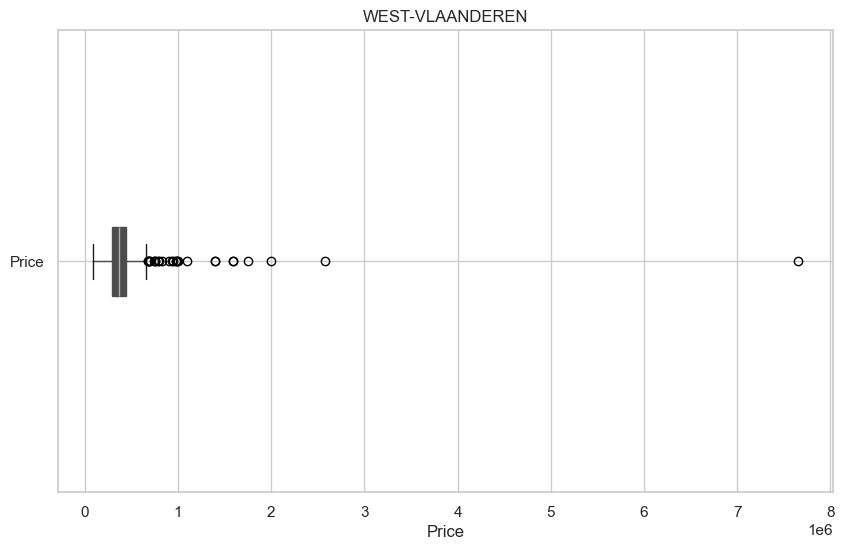

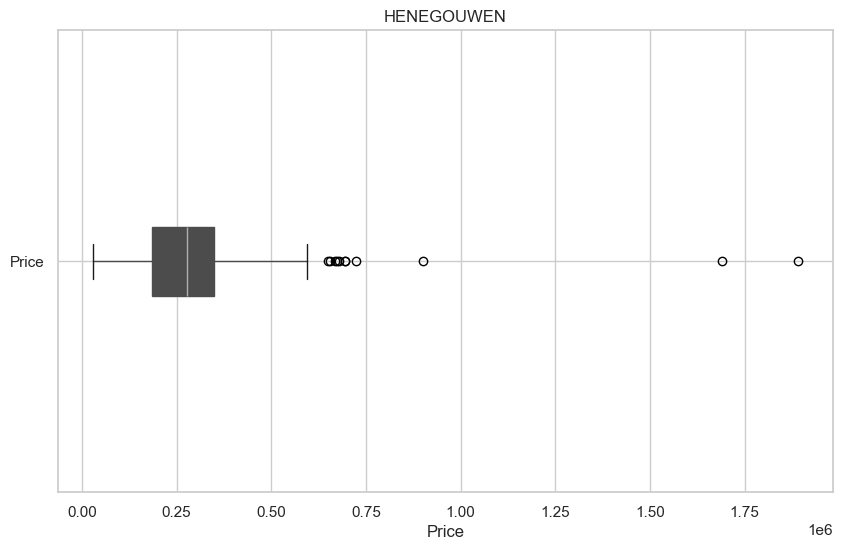

In [50]:
for prov in immo_H_raw.Province.unique():
    plt.figure(figsize=(10, 6)) 
    immo_H_raw[immo_H_raw['Province'] == prov].boxplot(column='Price', vert=False, patch_artist=True)
    plt.xlabel('Price')
    
    plt.title(prov)
    plt.show()

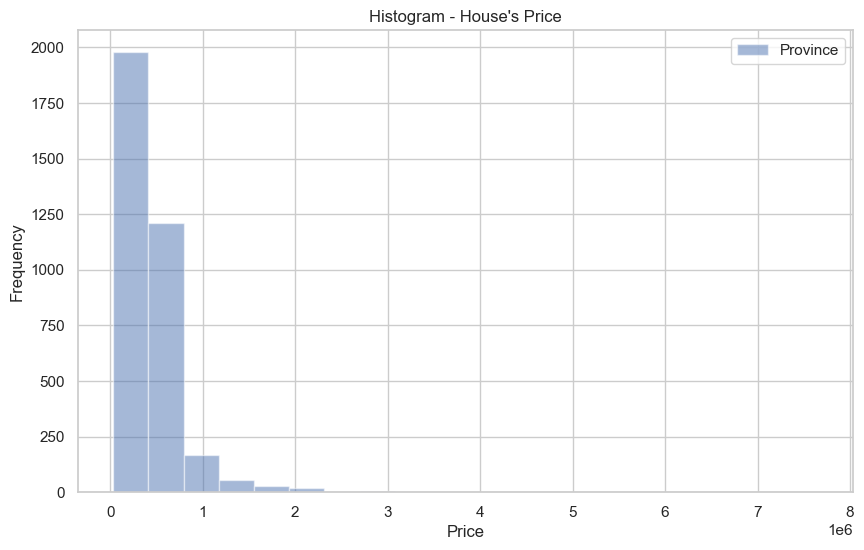

In [51]:
unique_regions = immo_H_raw['Province'].unique()

plt.figure(figsize=(10, 6))  


plt.hist(immo_H_raw['Price'], bins=20, alpha=0.5, label='Province')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Histogram - House's Price")
plt.legend()
plt.show()

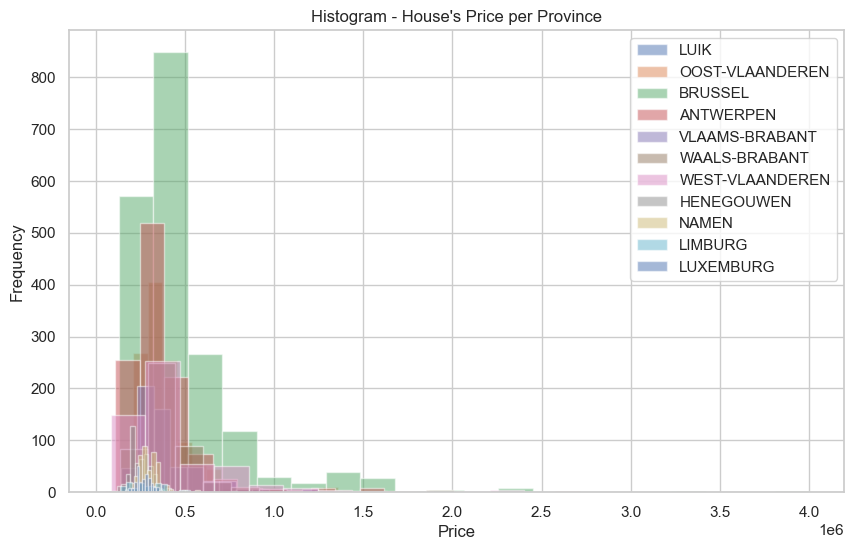

In [52]:
unique_regions = immo_AP_raw['Province'].unique()

plt.figure(figsize=(10, 6))  
for region in unique_regions:
    region_price = immo_AP_raw[immo_AP_raw['Province'] == region]['Price']
    plt.hist(region_price, bins=20, alpha=0.5, label=region)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Histogram - House's Price per Province")
plt.legend()
plt.show()

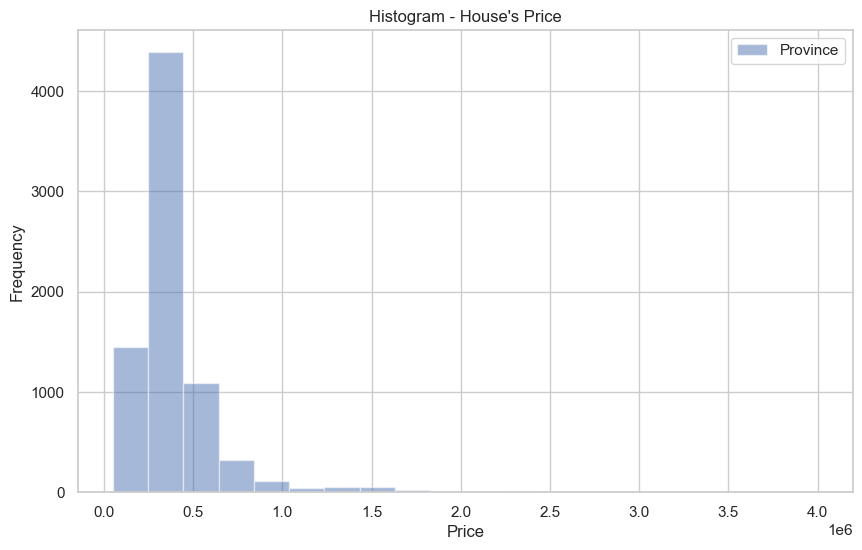

In [53]:
unique_regions = immo_AP_raw['Province'].unique()

plt.figure(figsize=(10, 6))  


plt.hist(immo_AP_raw['Price'], bins=20, alpha=0.5, label='Province')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Histogram - House's Price")
plt.legend()
plt.show()

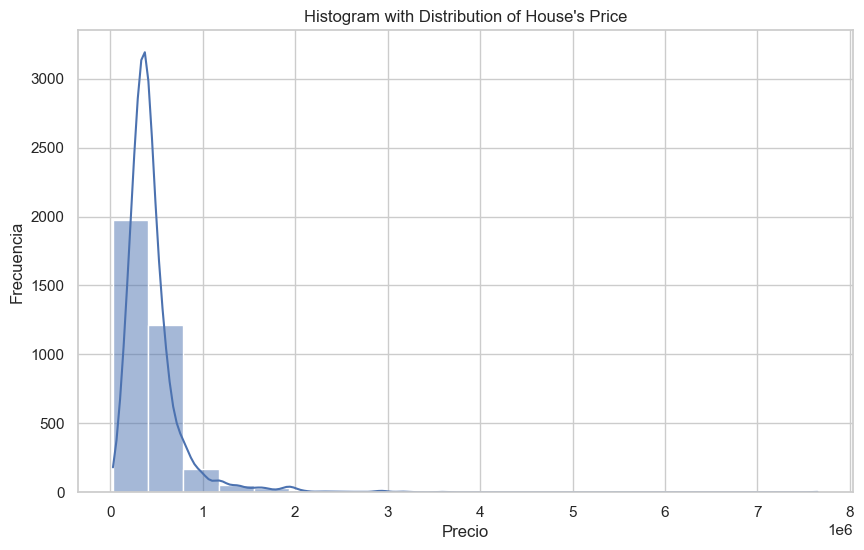

In [54]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(immo_H_raw['Price'], bins=20, kde=True)

# Ajustar la apariencia del gráfico
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title("Histogram with Distribution of House's Price")

# Mostrar el gráfico
plt.show()

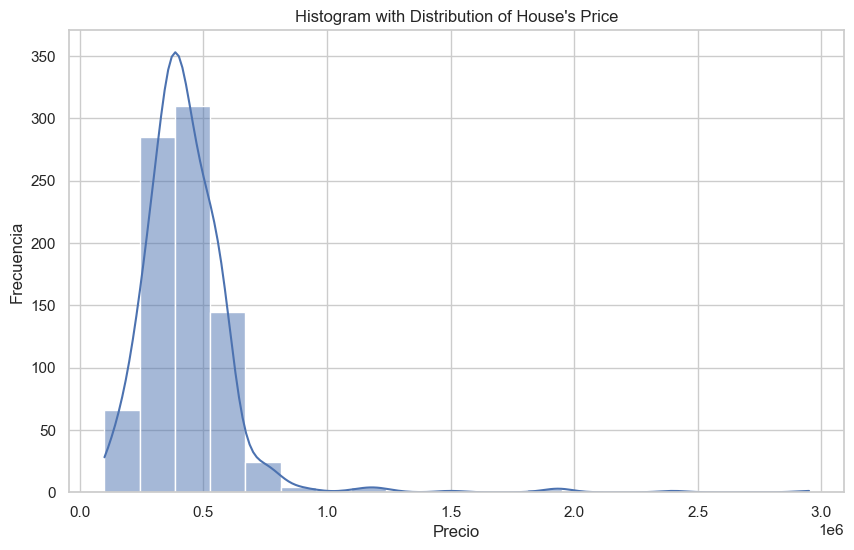

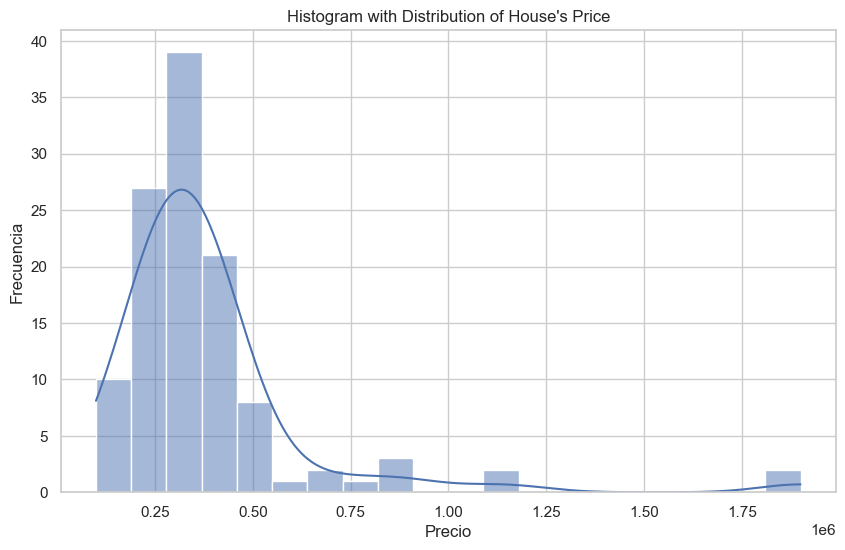

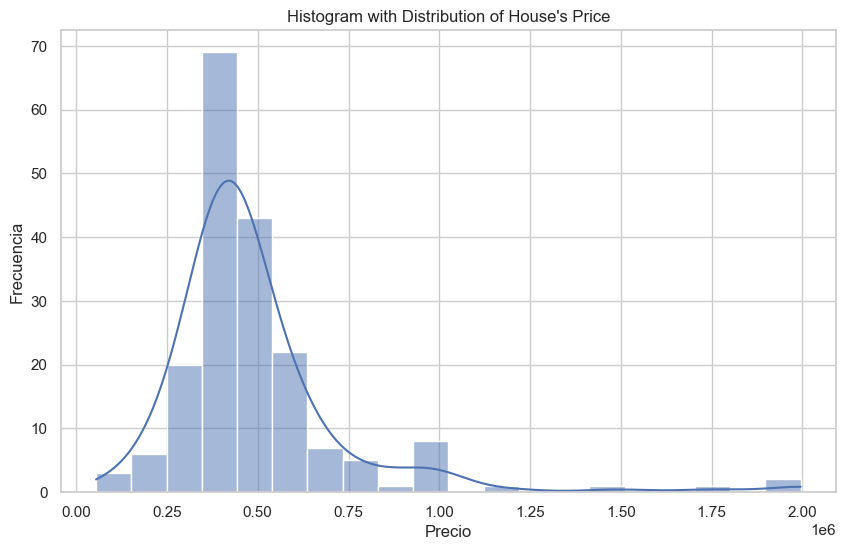

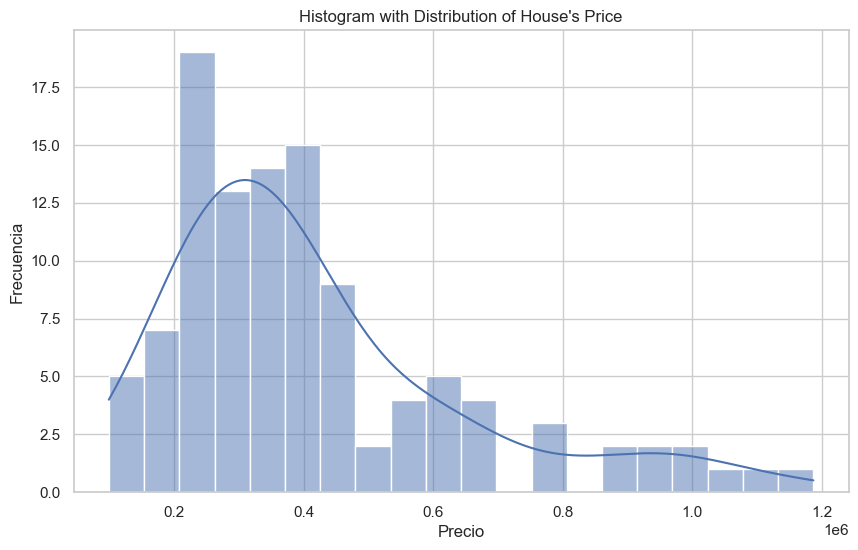

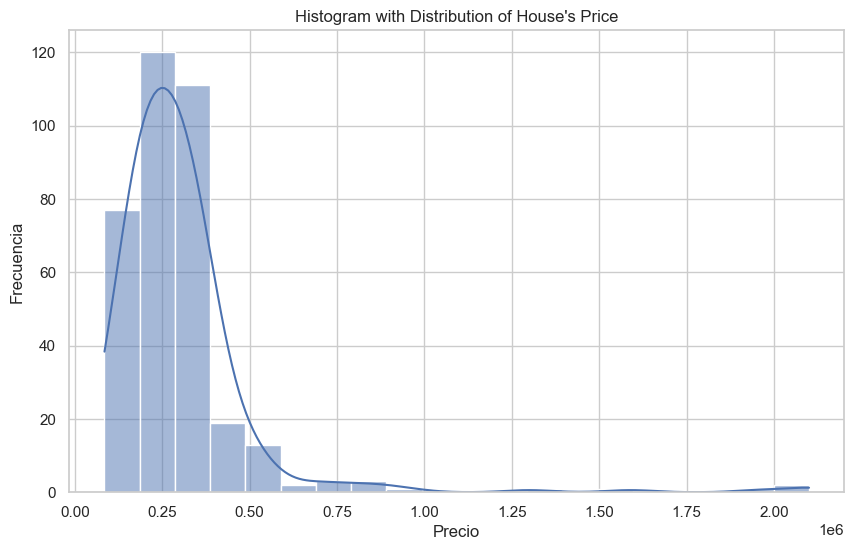

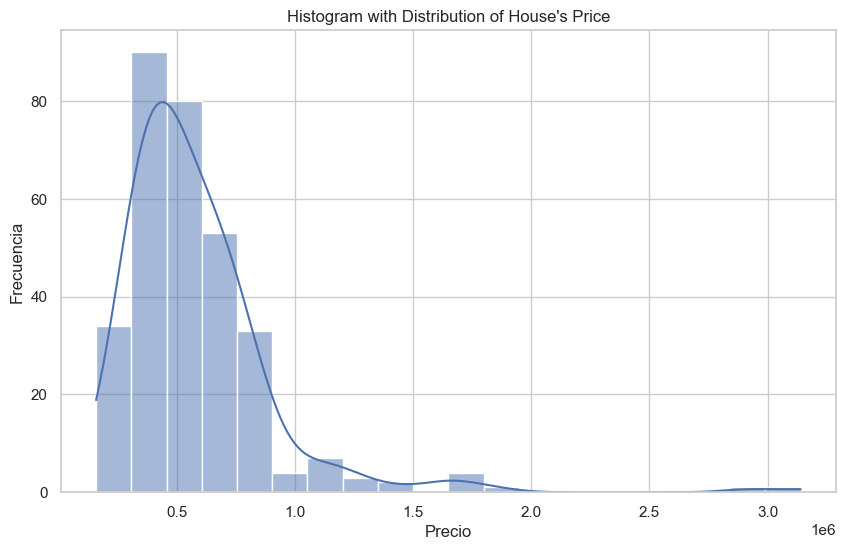

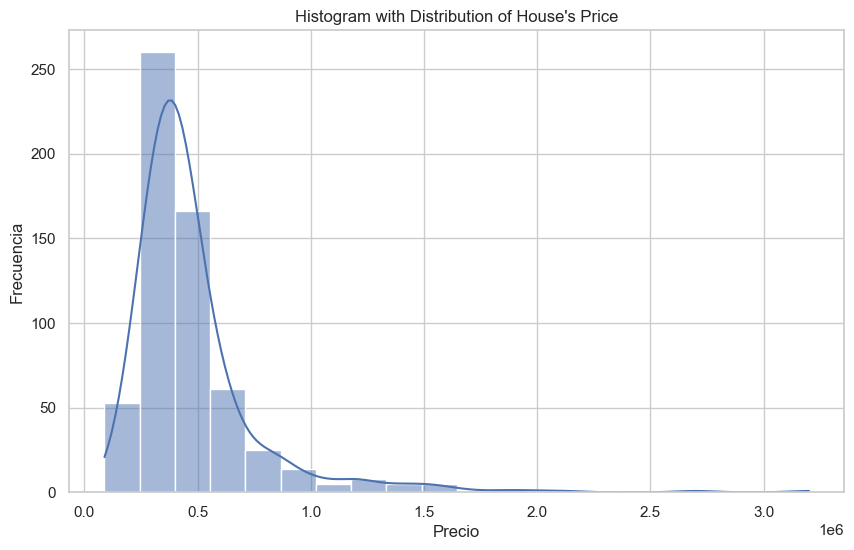

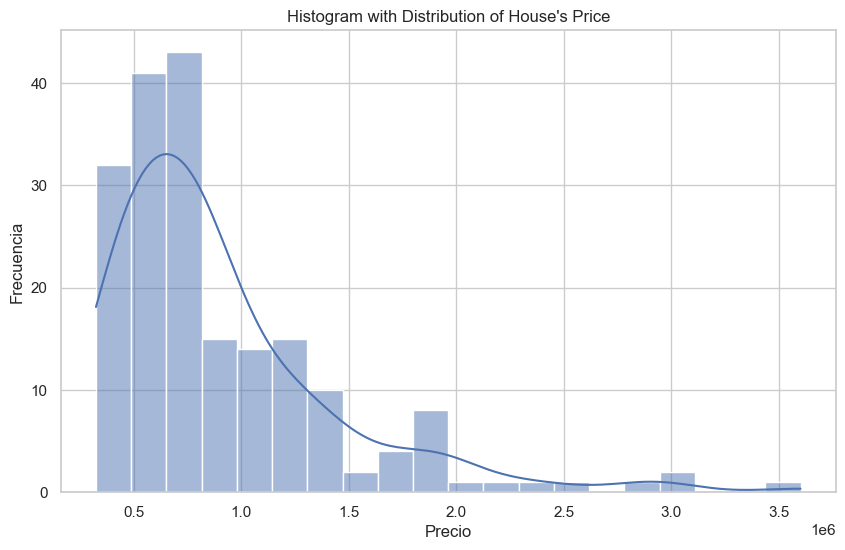

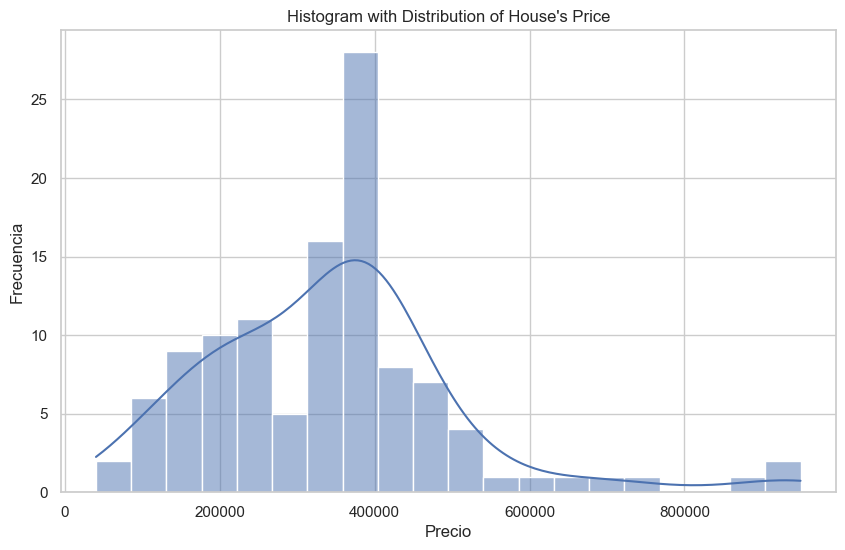

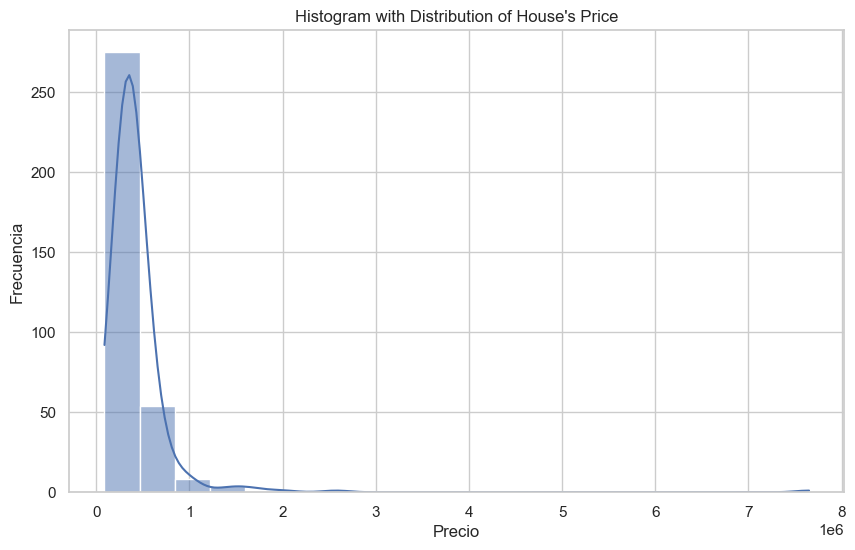

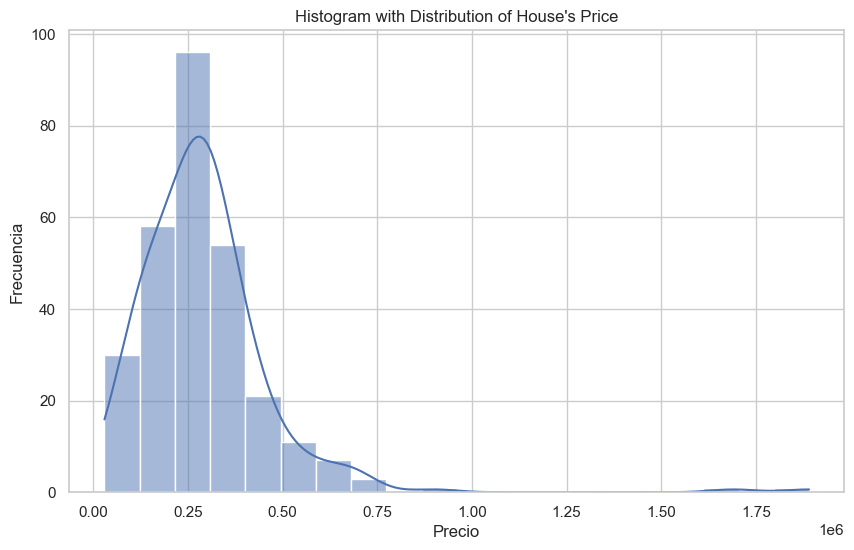

In [55]:

for prov in immo_H_raw.Province.unique():
    region_price = immo_H_raw[immo_H_raw['Province'] == prov]['Price']
    sns.set(style="whitegrid")
        
    plt.figure(figsize=(10, 6))
    sns.histplot(region_price, bins=20, kde=True)
    
    # Ajustar la apariencia del gráfico
    plt.xlabel('Precio')
    plt.ylabel('Frecuencia')
    plt.title("Histogram with Distribution of House's Price")
    
    # Mostrar el gráfico
    plt.show()  

# Deleting outliers en raw data

In [56]:
def remove_outliers_by_province(df, col_name, province_col):
    df_clean = pd.DataFrame()  
    for province, group in df.groupby(province_col):
        Q1 = group[col_name].quantile(0.25)  
        Q3 = group[col_name].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR  
        outliers_removed = group[(group[col_name] >= lower_bound) & (group[col_name] <= upper_bound)]
        df_clean = pd.concat([df_clean, outliers_removed]) 
    return df_clean


df_H_clean_raw = remove_outliers_by_province(immo_H_raw, 'Price', 'Province')
df_AP_clean_raw = remove_outliers_by_province(immo_AP_raw, 'Price', 'Province')

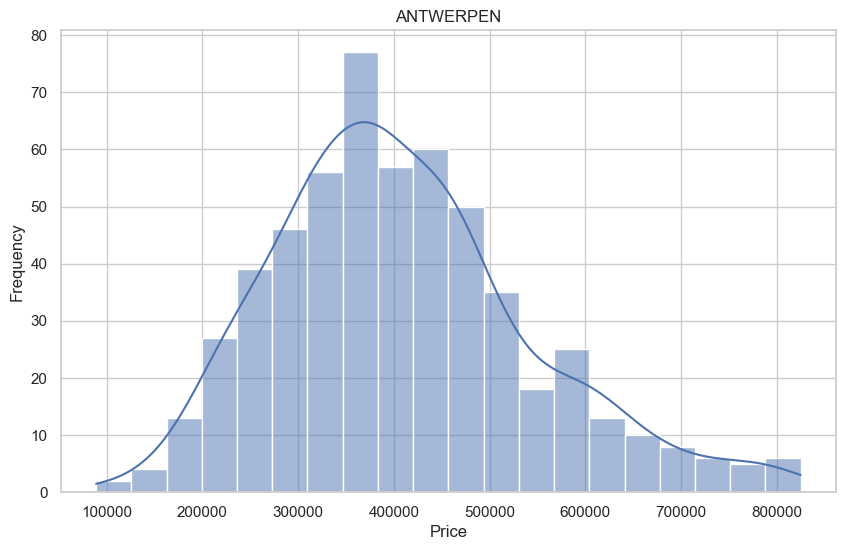

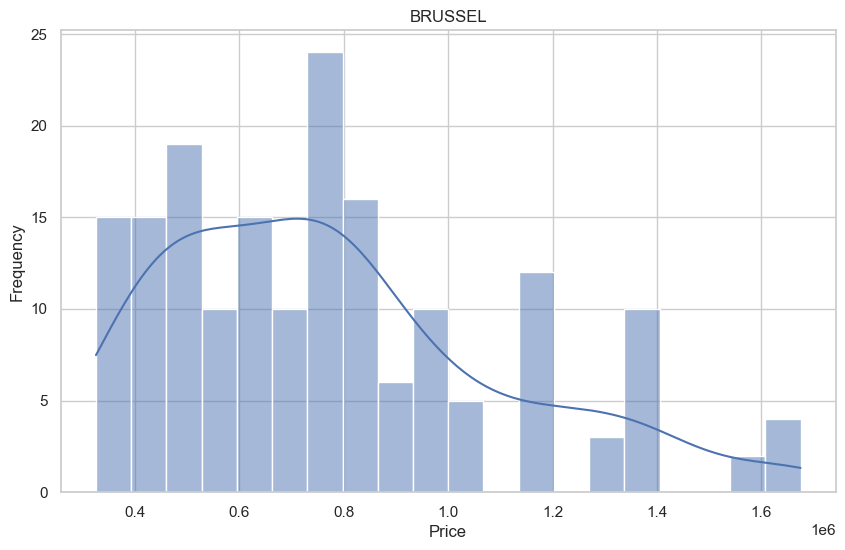

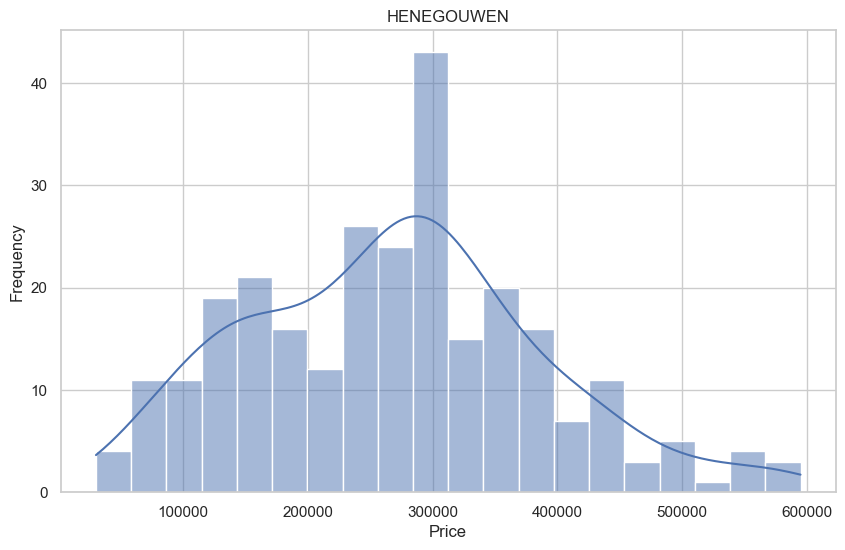

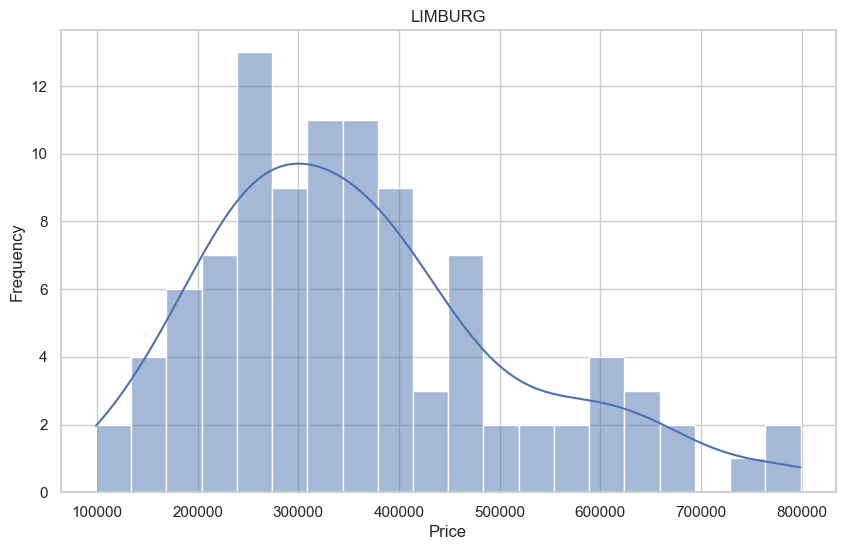

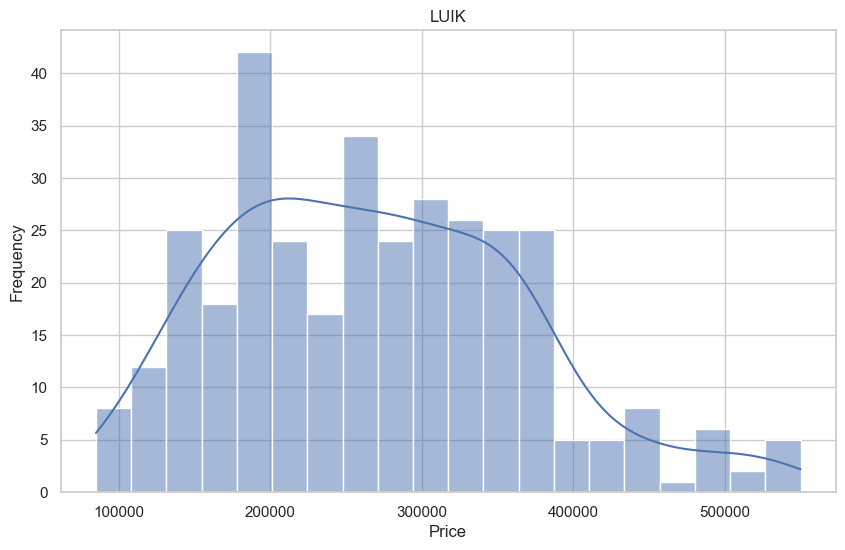

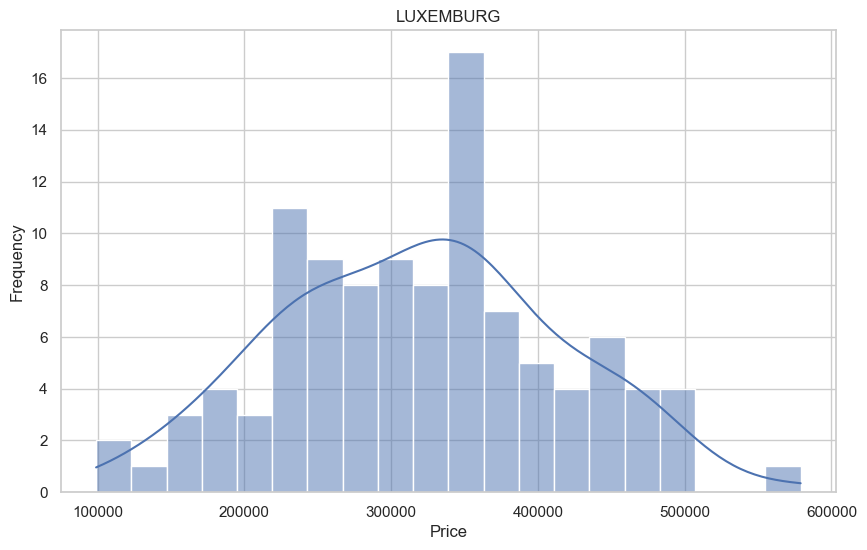

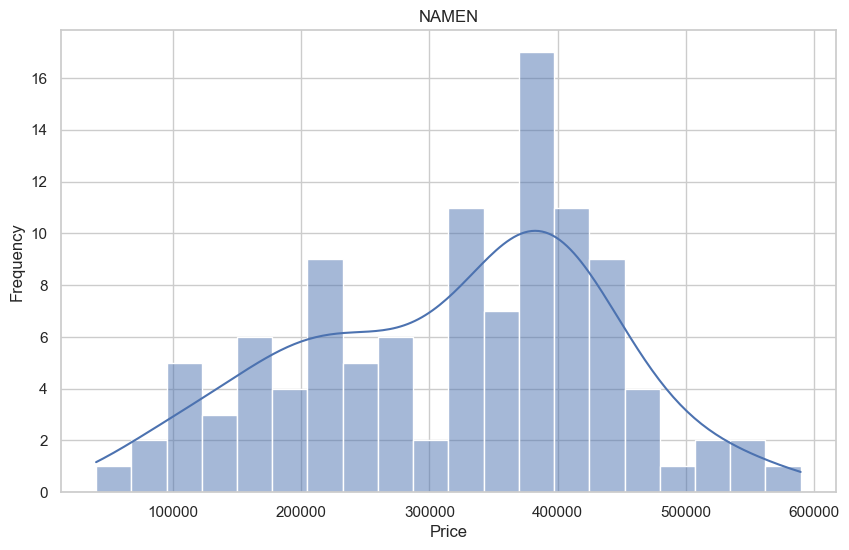

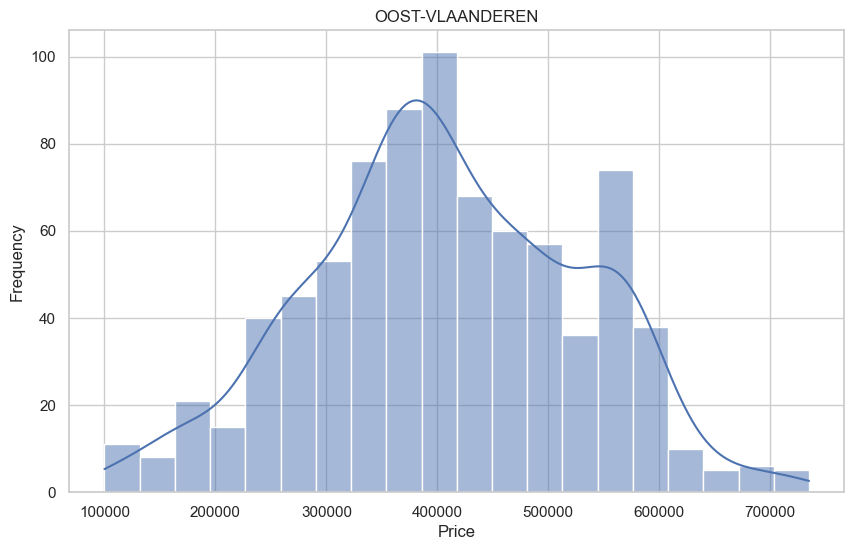

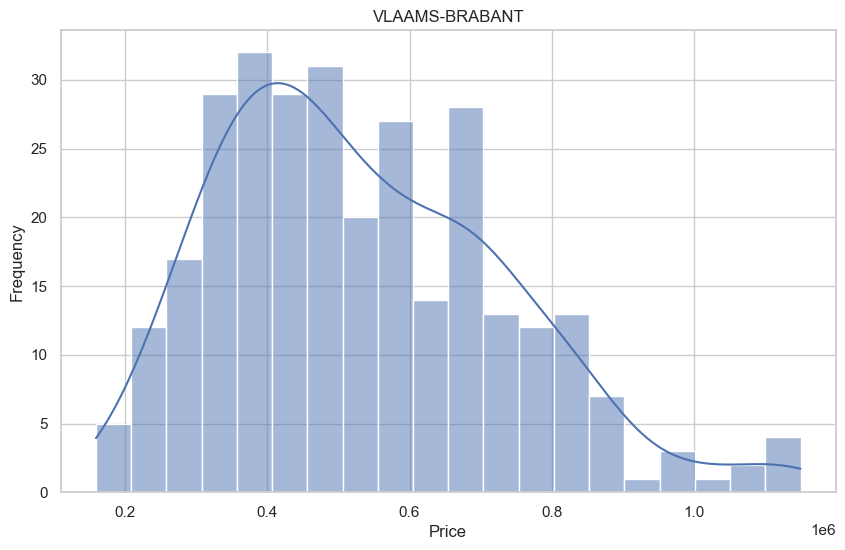

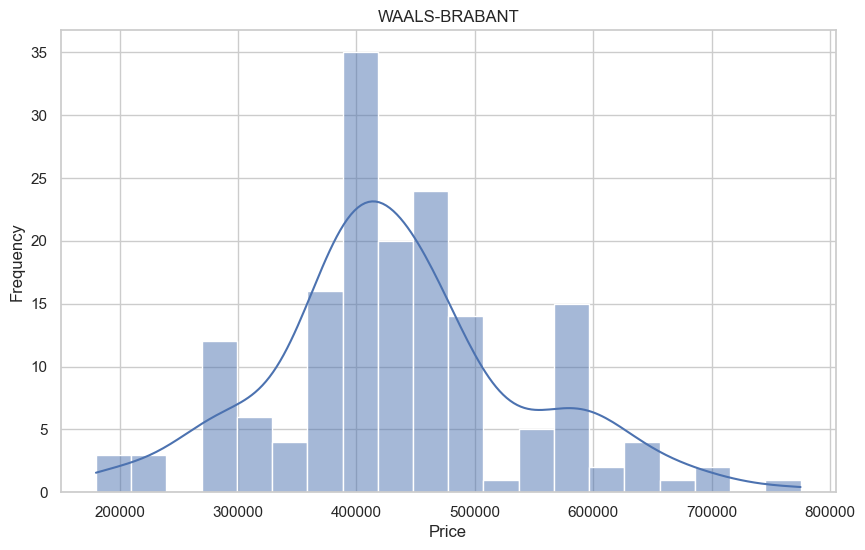

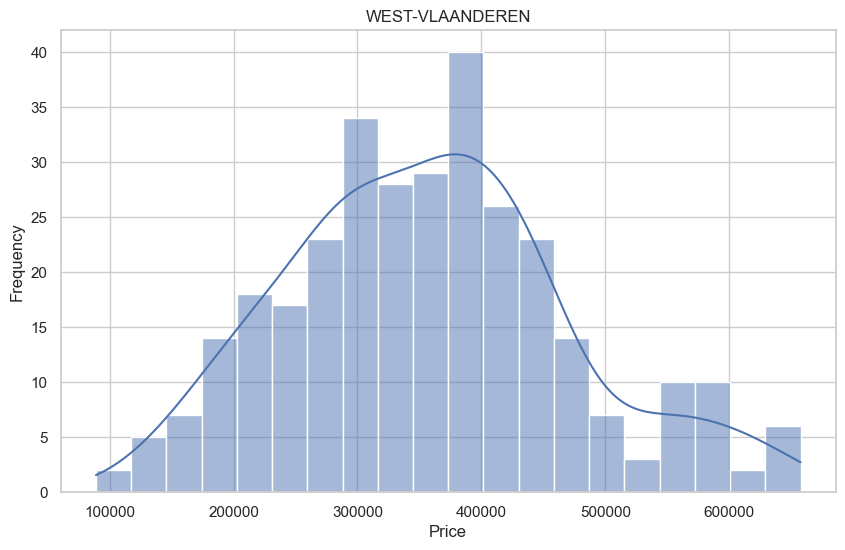

In [57]:
# House distribution by region after dealing with outliers

for prov in df_H_clean_raw.Province.unique():
    region_price = df_H_clean_raw[df_H_clean_raw['Province'] == prov]['Price']
    sns.set(style="whitegrid")
        
    plt.figure(figsize=(10, 6))
    sns.histplot(region_price, bins=20, kde=True)
    
    
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title(prov)
    
    plt.show() 

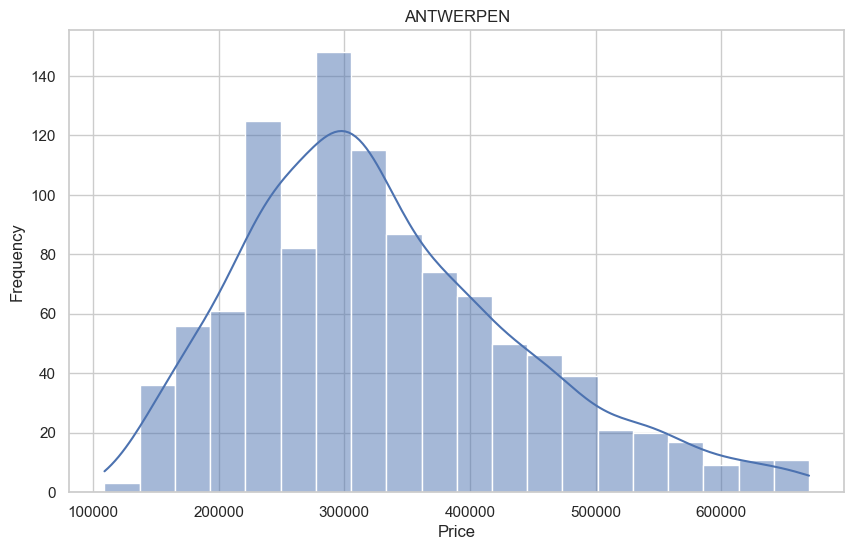

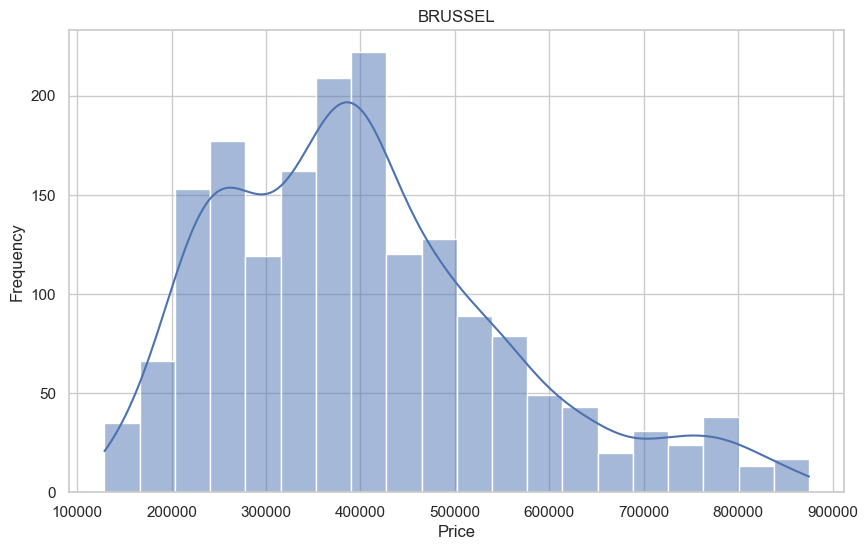

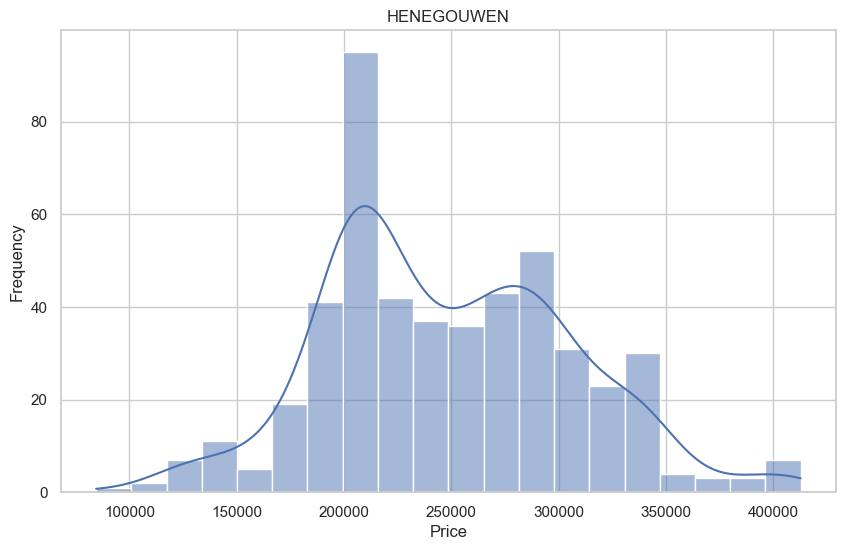

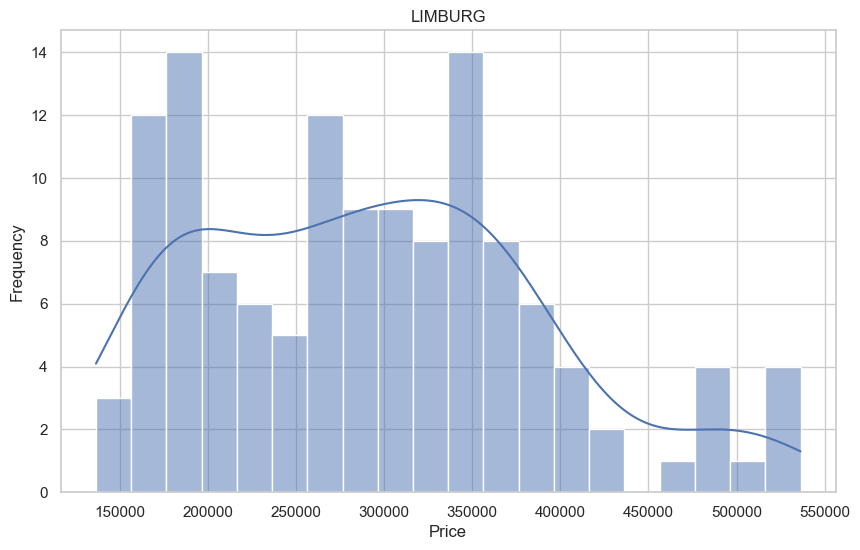

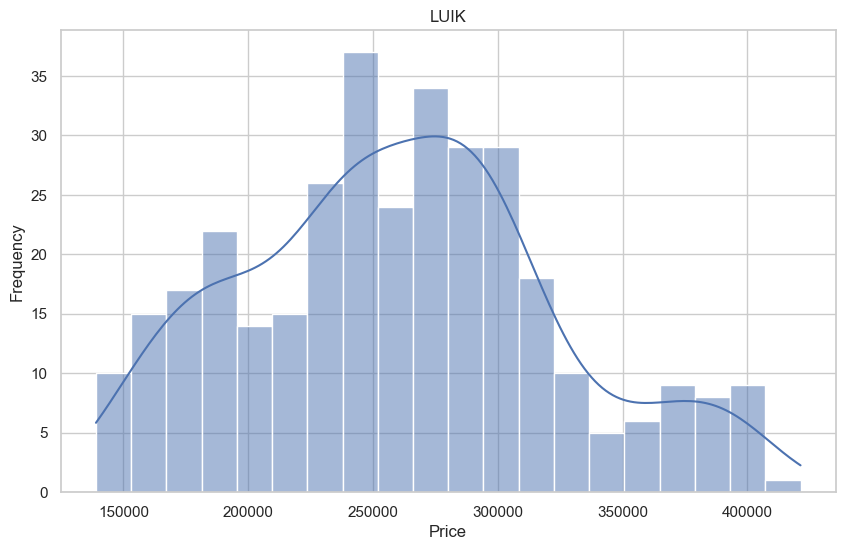

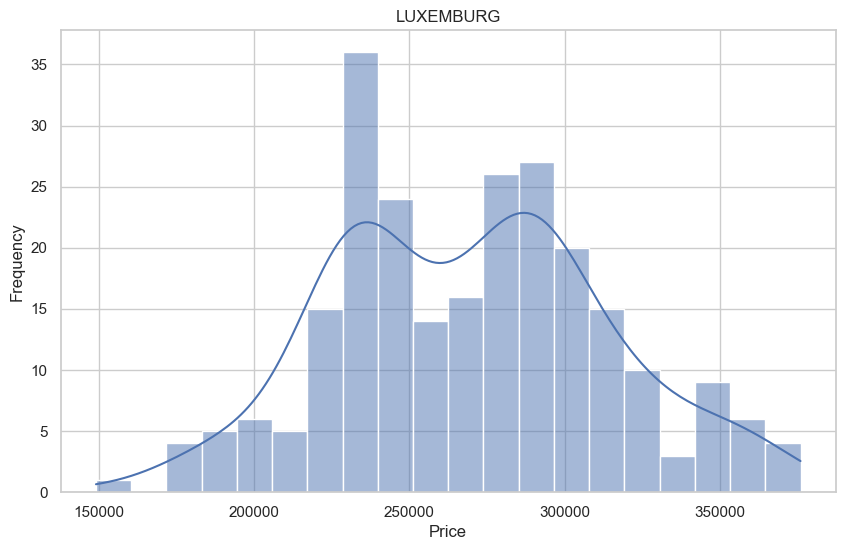

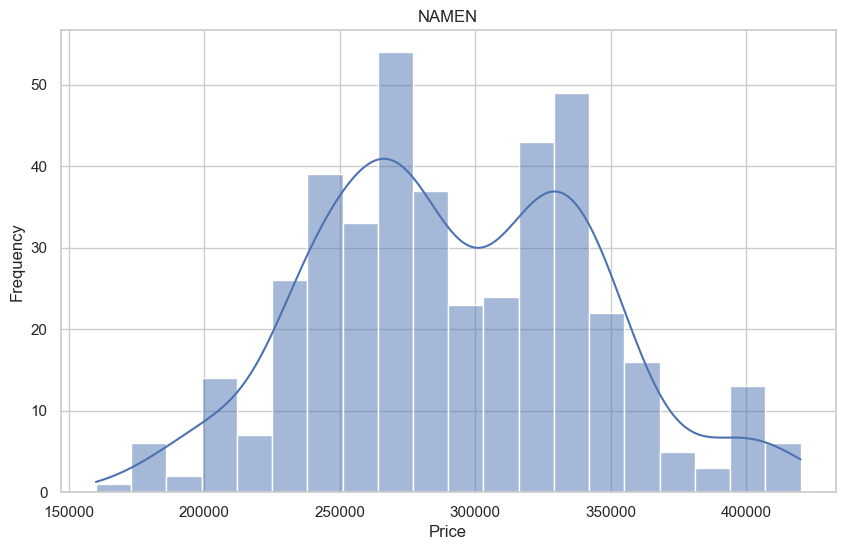

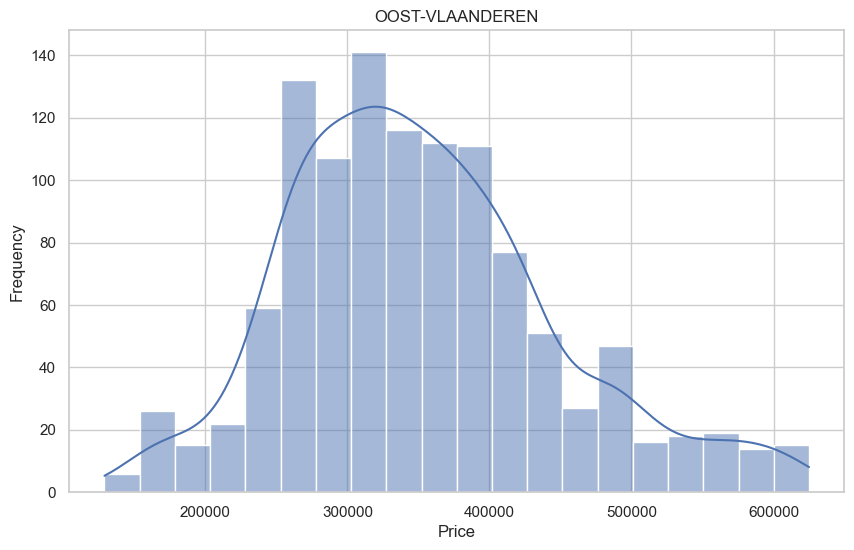

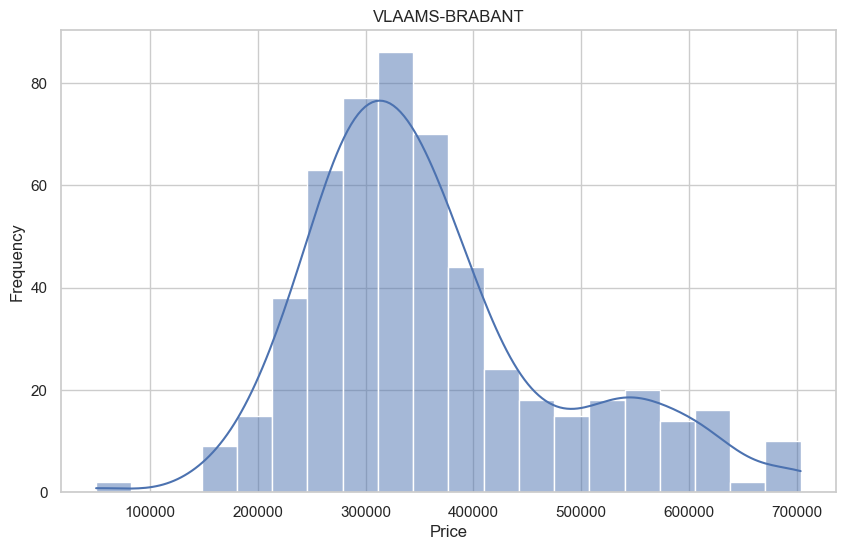

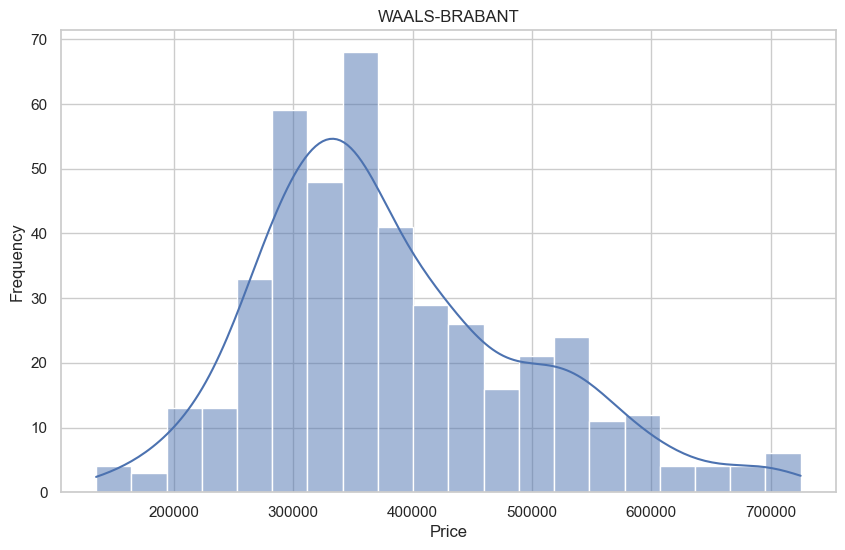

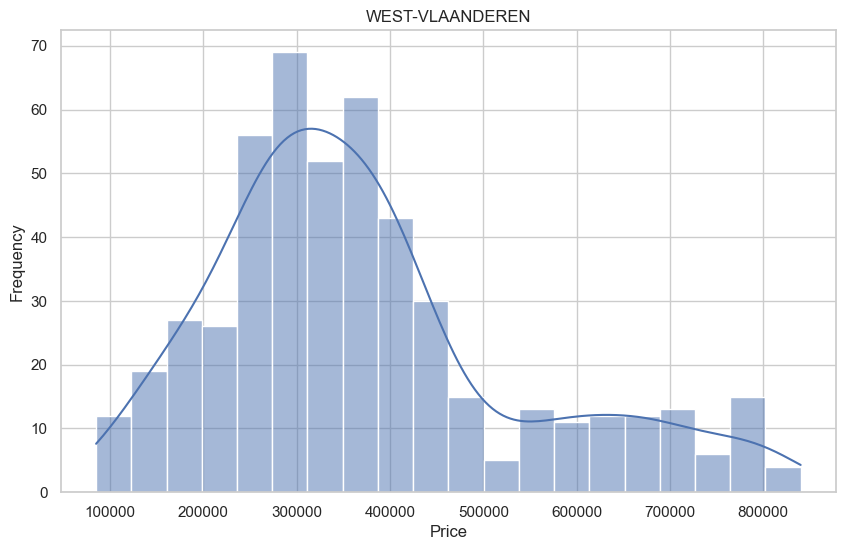

In [58]:
# Apartment's distribution by region after dealing with outliers

for prov in df_AP_clean_raw.Province.unique():
    region_price = df_AP_clean_raw[df_AP_clean_raw['Province'] == prov]['Price']
    sns.set(style="whitegrid")
        
    plt.figure(figsize=(10, 6))
    sns.histplot(region_price, bins=20, kde=True)
    
    
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title(prov)
    
    plt.show() 

### As shown by the data, we are in the presence of a binomial distribution

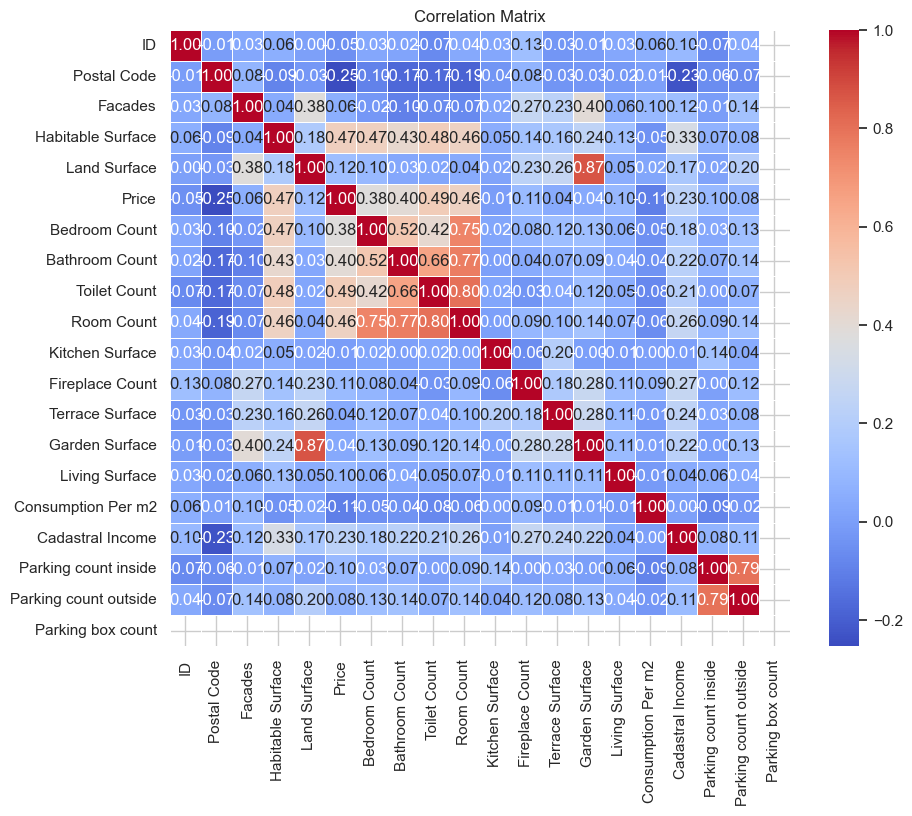

In [59]:
# Correlation matrix for houses after dealing with outliers

correlation_matrix = df_H_clean_raw[df_H_clean_raw.select_dtypes(include=['int', 'float']).columns].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

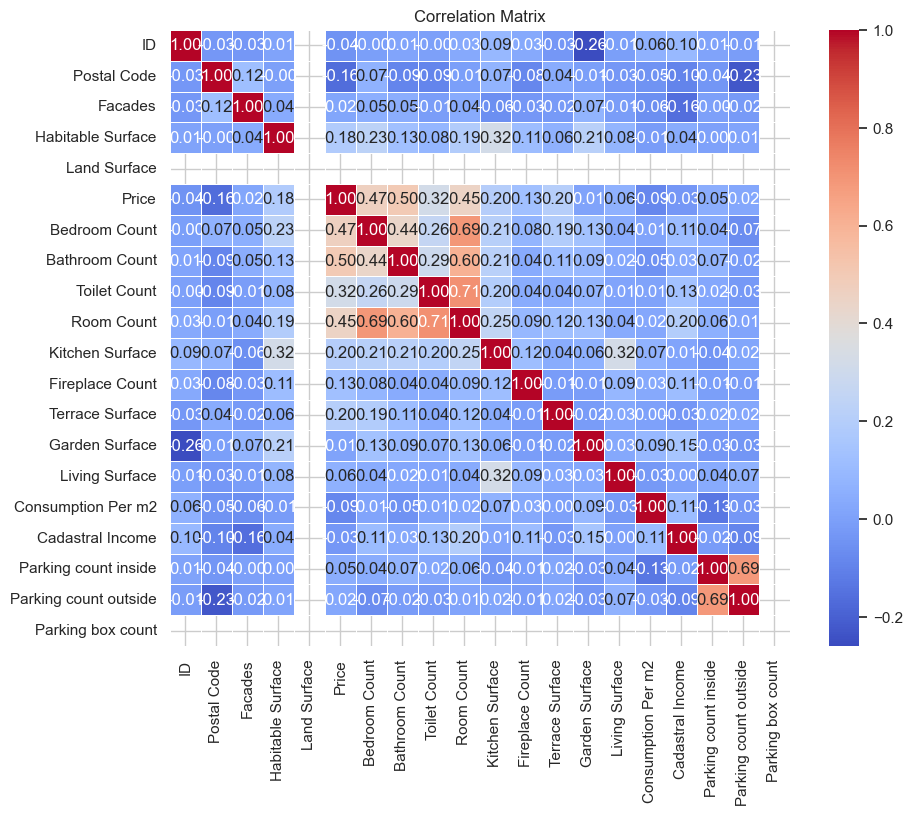

In [60]:
# Correlation matrix for apartments after dealing with outliers

correlation_matrix = df_AP_clean_raw[df_AP_clean_raw.select_dtypes(include=['int', 'float']).columns].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()